                     count unique                       top freq
Deadline                                                        
~ 01/02(토)(10일 전 등록)     1      1  청담 Page By Page프로젝트 독서논술    1
~ 01/09(토)(4시간 전 등록)     1      1                 제이피스 주식회사    1
~ 01/09(토)(5시간 전 등록)     1      1                 제이피스 주식회사    1
~ 02/02(화)(5일 전 등록)      1      1                 (주)스마트동스쿨    1
~ 02/05(금)(3일 전 등록)      1      1                   (주)와이어즈    1
~ 12/13(일)(59일 전 등록)     1      1                     다본(주)    1
~ 12/15(화)(9일 전 등록)      1      1                   (주)레파토리    1
~ 12/16(수)(2시간 전 등록)     1      1                     ㈜키스템프    1
~ 12/26(토)(13일 전 등록)     1      1                     스마티파이    1
~ 12/31(목)(13일 전 등록)     1      1                  (주)플랜홀딩스    1
채용시(12일 전 등록)            1      1                 콴타시스템 코리아    1
채용시(20일 전 등록)            1      1                   트리시티(주)    1
           count unique                       top freq
WorkPlace                          

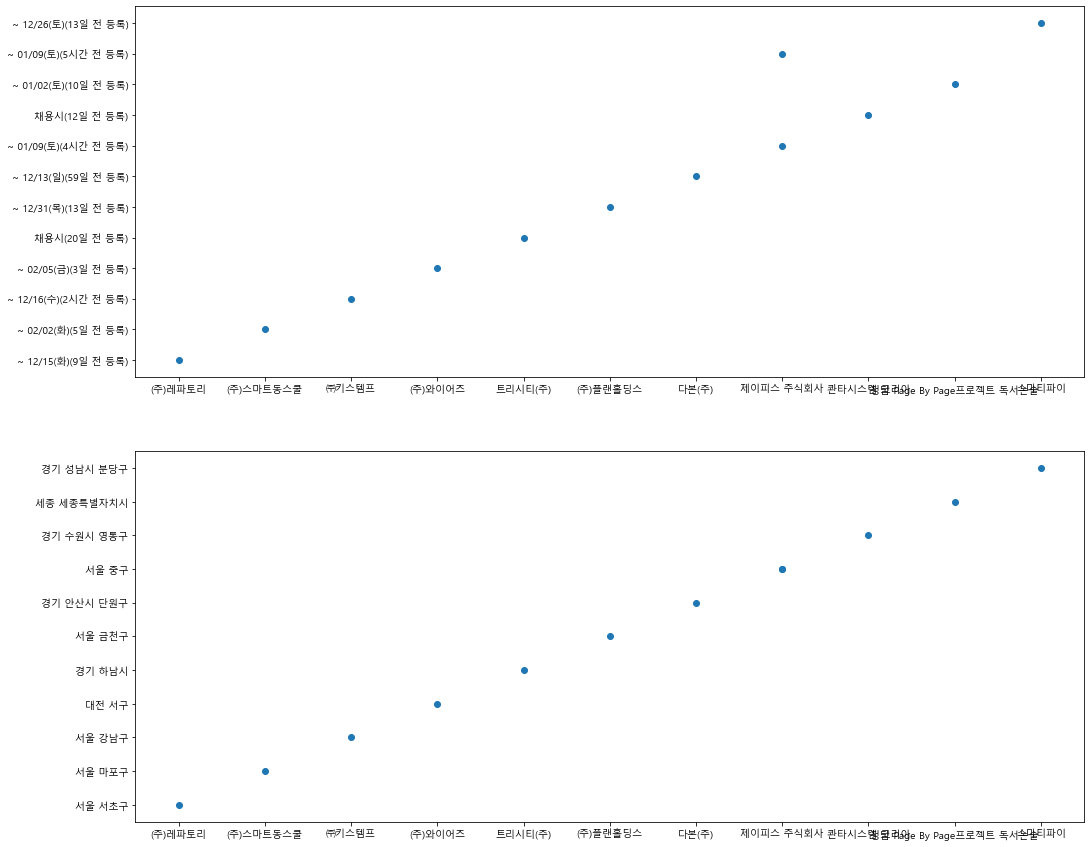

In [9]:
#이 프로젝트는 사람인 포털사이트의 자료를 크롤링하여 기업별 마감기한 및 기업별 위치를 가져와 하나씩 매칭해주어
#구직자가 마감기한과 기업별 위치를 파악할 때에 매우 유용할 것이라는 생각이 들어 만들었습니다.

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() #그래프 내부의 한글 출력
rc('font', family=font_name)

data1 = {'CompanyName' : [] , 'Deadline' : []} # 이름, 날짜
data2 = {'CompanyName' : [] , 'WorkPlace' : []} # 이름, 지역 

response = requests.get('http://www.saramin.co.kr/zf_user/jobs/list/job-category')

html = response.text
soup = BeautifulSoup(html, 'html.parser')

employ_list = soup.select('div.list_body > div.list_item') # 회사 이름 클래스 선택
i=0
for emp in employ_list:
    companytitle = emp.select_one('a.str_tit').text #a.str_tit 회사 이름
    dead = emp.select_one('p.deadlines').text  #p.deadlines 회사 지원 마감기한
    work = emp.select_one('p.work_place').text #p.work_place 회사 위치
    data1['CompanyName'].append(companytitle) 
    data1['Deadline'].append(dead)
    data2['CompanyName'].append(companytitle)
    data2['WorkPlace'].append(work)
    i+=1
    if i == 12: break #데이터 양이 너무 많아서 데이터를 12개까지만 출력하게 만드는 부분


dataframe1 = pd.DataFrame(data1)
dataframe2 = pd.DataFrame(data2)


fig = plt.figure(figsize=(17,15)) 

axe1 = fig.add_subplot(2,1,1) #데이터 그래프를 2개로 나누어 표현
axe2 = fig.add_subplot(2,1,2)

axe1.scatter(dataframe1['CompanyName'], dataframe1['Deadline']) #회사이름 공고 마감기한 그래프
axe2.scatter(dataframe2['CompanyName'], dataframe2['WorkPlace']) #회사이름 위치 그래프

gr1 = dataframe1.groupby('Deadline')['CompanyName'].describe()
gr2 = dataframe2.groupby('WorkPlace')['CompanyName'].describe()      

print(gr1)
print(gr2)
print(dataframe1)
print(dataframe2)
#print(dataframe)